<a href="https://colab.research.google.com/github/OscarBedford/MLCourse_Weekly_Exercises/blob/main/Exercise_7_10_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Dataset with brain atlas B: use the Oasis dataset to predict a continuous outcome (subject’s age) from structural brain scans.

*Note: use Ridge() instead of LogisticRegression() to predict the continuous subject age using the lowest-resolution version of Craddock region atlas (.scorr_mean), and use the R2 coefficient of determination instead of classification accuracy (sklearn.metrics.r2_score).*

``Task 7.10:`` analogous to ``Task 5``

In [ ]:
%%capture
!pip install nilearn

In [ ]:
%%capture
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib

In [ ]:
%%capture
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.model_selection import cross_val_score

In [ ]:
# We prepare the model with the required parameters 
logreg = Ridge()

# We prepare the inner iterating variable 
k_list = list(range(1,21))

In [ ]:
# We pre-allocate the variables to store the scores
kMM_coefs = []
gmm_coefs = []
pca_coefs = []
ica_coefs = []

In [ ]:
%%capture
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
crad = datasets.fetch_atlas_craddock_2012()
atlas_nii = index_img(crad['scorr_mean'], (1)) # We set this value to the lowest resolution
masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True)
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:, 0] # gives subject age on standard units after z-scoring

for i in k_list:
    X, y = input_variables, output_variable
    X = scaler.fit_transform(X)

    kf = KFold(n_splits=5, random_state=(i), shuffle=True)

    kMM = KMeans(n_clusters=10, random_state=(42)).fit(X)
    X_kMM = kMM.transform(X)
    coefs1 = cross_validate(logreg, X_kMM, y, cv=kf, return_estimator=True)
    for model in coefs1['estimator']:
          kMM_coefs.append(model.coef_)

    gmm = GaussianMixture(n_components=10,random_state=(42)).fit(X)
    X_gmm = gmm.predict_proba(X)      
    coefs2 = cross_validate(logreg, X_gmm, y, cv=kf, return_estimator=True)
    for model in coefs2['estimator']:
          gmm_coefs.append(model.coef_)

    pca = PCA(n_components=10,random_state=(42)).fit(X)
    X_pca = pca.transform(X)
    coefs3 = cross_validate(logreg, X_pca, y, cv=kf, return_estimator=True)
    for model in coefs3['estimator']:
          pca_coefs.append(model.coef_)

    ica = FastICA(n_components=10,random_state=(42),tol=0.01).fit(X)
    X_ica = ica.transform(X)
    coefs4 = cross_validate(logreg, X_ica, y, cv=kf, return_estimator=True)
    for model in coefs4['estimator']:
          ica_coefs.append(model.coef_)

In [ ]:
df_kMM = np.squeeze(kMM_coefs)
df_gmm = np.squeeze(gmm_coefs)
df_pca = np.squeeze(pca_coefs)
df_ica = np.squeeze(ica_coefs)

df_kMM = pd.DataFrame(df_kMM)
df_gmm = pd.DataFrame(df_gmm)
df_pca = pd.DataFrame(df_pca)
df_ica = pd.DataFrame(df_ica)

df_kMM.columns=list(range(1,11))
df_kMM.index=list(range(1,101))
df_kMM = df_kMM[::-1]
df_kMM = df_kMM.transpose() 

df_gmm.columns=list(range(1,11))
df_gmm.index=list(range(1,101))
df_gmm = df_gmm[::-1]
df_gmm = df_gmm.transpose() 

df_pca.columns=list(range(1,11))
df_pca.index=list(range(1,101))
df_pca = df_pca[::-1]
df_pca = df_pca.transpose() 

df_ica.columns=list(range(1,11))
df_ica.index=list(range(1,101))
df_ica = df_ica[::-1]
df_ica = df_ica.transpose() 

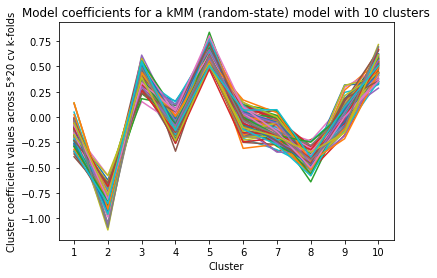

In [ ]:
x=np.array(list(range(1,11)))

plt.plot(x,df_kMM)
plt.gca().set(
    title="Model coefficients for a kMM (random-state) model with 10 clusters",
    xlabel="Cluster",
    ylabel="Cluster coefficient values across 5*20 cv k-folds",
    xticks = (x),
)
plt.show()

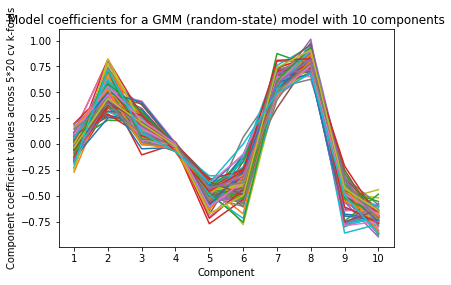

In [ ]:
x=np.array(list(range(1,11)))

plt.plot(x,df_gmm)
plt.gca().set(
    title="Model coefficients for a GMM (random-state) model with 10 components",
    xlabel="Component",
    ylabel="Component coefficient values across 5*20 cv k-folds",
    xticks = (x),
)
plt.show()

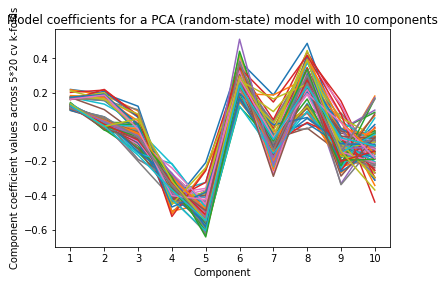

In [ ]:
x=np.array(list(range(1,11)))

plt.plot(x,df_pca)
plt.gca().set(
    title="Model coefficients for a PCA (random-state) model with 10 components",
    xlabel="Component",
    ylabel="Component coefficient values across 5*20 cv k-folds",
    xticks = (x),
)
plt.show()

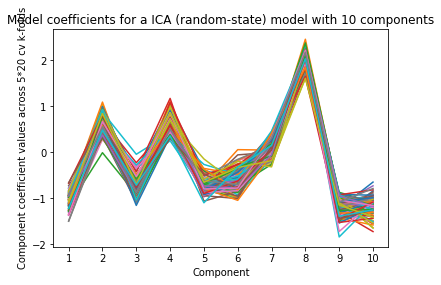

In [ ]:
x=np.array(list(range(1,11)))

plt.plot(x,df_ica)
plt.gca().set(
    title="Model coefficients for a ICA (random-state) model with 10 components",
    xlabel="Component",
    ylabel="Component coefficient values across 5*20 cv k-folds",
    xticks = (x),
)
plt.show()